#Step 1: Preprocessing the dataset

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and punkt_tab
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab data

# Load dataset
# The encoding parameter is set to 'latin1' to handle the file
df = pd.read_csv("/content/spam.csv", encoding='latin1')

# Function for text preprocessing
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase and ensure it's a string
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stop words
    return " ".join(tokens)  # Convert back to text

# Apply preprocessing
df["cleaned_message"] = df["message"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
# Display sample
print("\nAfter preprocessing:")
df.head()


After preprocessing:


,class,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


#

In [3]:
from sklearn.model_selection import train_test_split

# Rename columns for clarity
df.rename(columns={'v1': 'class', 'v2': 'Message'}, inplace=True)

# Convert labels into numerical format: Spam -> 1, Ham -> 0
df['class'] = df['class'].map({'spam': 1, 'ham': 0})

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned_message"], df["class"], test_size=0.2, stratify=df["class"], random_state=42
)

# Display dataset sizes
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 4457
Testing set size: 1115


#Step 3: Train an RNN Model on the Training Data

build and train a Recurrent Neural Network (RNN) using TensorFlow/Keras for text classification.

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Tokenization
MAX_WORDS = 5000  # Vocabulary size
MAX_SEQUENCE_LENGTH = 100  # Max words per email

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Define RNN model (LSTM-based)
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH),
    SpatialDropout1D(0.2),  # Helps prevent overfitting
    LSTM(64, return_sequences=False),  # LSTM layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, batch_size=32)

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8590 - loss: 0.4313 - val_accuracy: 0.8664 - val_loss: 0.3941
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8684 - loss: 0.3913 - val_accuracy: 0.8664 - val_loss: 0.3946
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8649 - loss: 0.3982 - val_accuracy: 0.8664 - val_loss: 0.3942
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8638 - loss: 0.3988 - val_accuracy: 0.8664 - val_loss: 0.3961
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8567 - loss: 0.4147 - val_accuracy: 0.8664 - val_loss: 0.3932
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8696 - loss: 0.3878 - val_accuracy: 0.8664 - val_loss: 0.3933
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8618 - loss: 0.4019 - val_accuracy: 0.8664 - val_loss: 0.3942
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8584 - loss: 0.4092 - val_accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,068,421 (7.89 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,378,948 (5.26 MB)

#Step 4: Monitor Training Metrics (Loss & Accuracy)

To ensure our RNN model is learning effectively, we need to monitor key metrics like loss and accuracy during training.

 # Best Ways to Monitor Training:

 Plot Training & Validation Curves: Helps detect overfitting or underfitting.

 Use TensorBoard: Provides real-time visualization of training progress.

 Check Training Logs: Prints loss and accuracy after every epoch.

# Implementation (Plot Training Metrics Using Matplotlib)

In [5]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

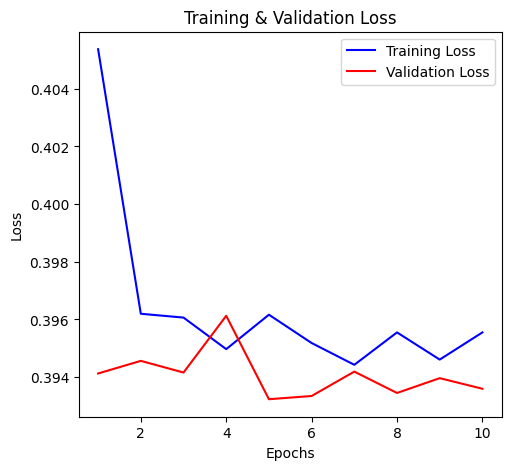

In [6]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

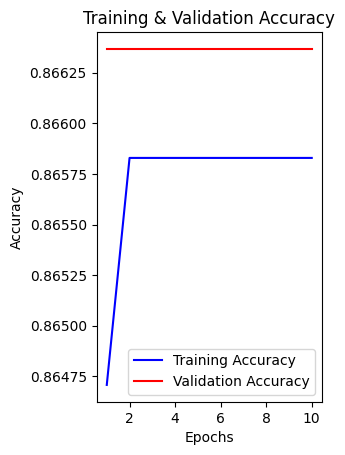

In [7]:
# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

# Real-Time Monitoring Using TensorBoard (Optional)

For a more interactive way to track metrics, use TensorBoard:

In [8]:
from tensorflow.keras.callbacks import TensorBoard

# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="logs", histogram_freq=1)

# Retrain model with TensorBoard callback
history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test),
                    epochs=10, batch_size=32, callbacks=[tensorboard_callback])

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8674 - loss: 0.3916 - val_accuracy: 0.8664 - val_loss: 0.3946
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8681 - loss: 0.3902 - val_accuracy: 0.8664 - val_loss: 0.3936
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8662 - loss: 0.3945 - val_accuracy: 0.8664 - val_loss: 0.3941
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8619 - loss: 0.4022 - val_accuracy: 0.8664 - val_loss: 0.3934
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8698 - loss: 0.3870 - val_accuracy: 0.8664 - val_loss: 0.3933
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8655 - loss: 0.3955 - val_accuracy: 0.8664 - val_loss: 0.3933
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8653 - loss: 0.3960 - val_accuracy: 0.8664 - val_loss: 0.3954
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8759 - loss: 0.3775 - val_accu

#Step 5: Evaluate the Trained RNN Model on Test Data

Now that our RNN model is trained, we need to evaluate its performance on the test set.

# Implementation (Evaluate Model Using Accuracy & Classification Report)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Get model predictions (probabilities)
y_pred_probs = model.predict(X_test_padded)

# Convert probabilities to binary class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Test Accuracy: 0.8664
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Advanced Evaluation: ROC Curve & AUC Score

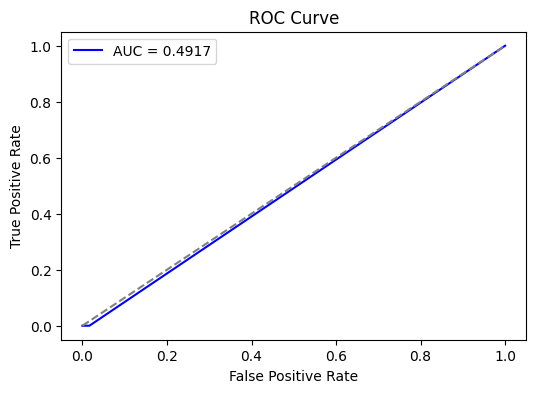

In [10]:
from sklearn.metrics import roc_curve, auc

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#Step 6: Calculate Evaluation Metrics (Accuracy, Precision, Recall, F1-score)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert predicted probabilities to binary labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")

🔹 Accuracy: 0.8664


#Step 7: Analyze the Performance of Your Model

#1. Compare Training vs. Validation Accuracy

In [13]:
train_acc = history.history['accuracy'][-1]  # Last epoch's training accuracy
val_acc = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

Training Accuracy: 0.8658
Validation Accuracy: 0.8664


#2. Analyze Confusion Matrix (Identify Misclassification Trends)

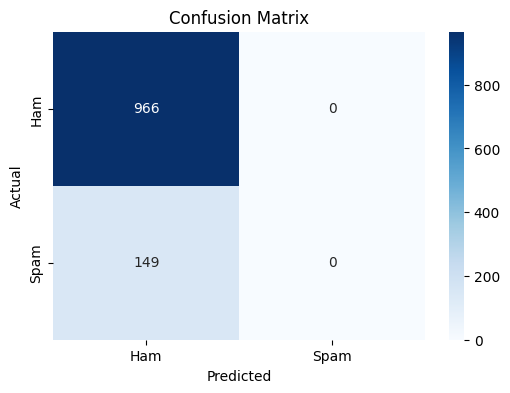

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#3. Check Precision-Recall Tradeoff (Tuning Threshold)

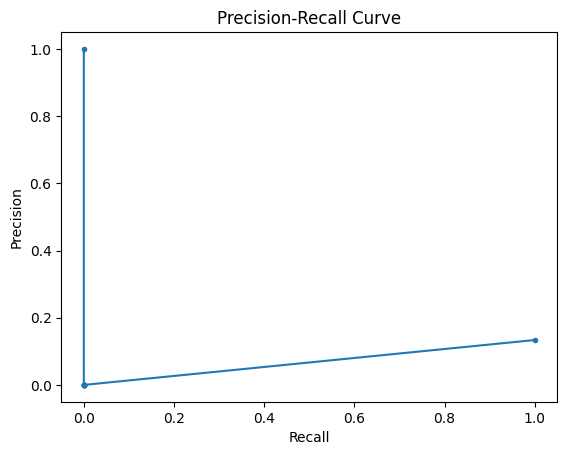

In [15]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()